<a href="https://colab.research.google.com/github/Anikethb05/Quantum-Computing/blob/main/Grover's_algorithm%20Lab%202025-09-17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grover's Algorithm Lab 2025-09-17 : 1RVU23CSE056

In [14]:
#!pip install qiskit qiskit-aer pylatexenc

In [15]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.circuit.library import MCMTGate, XGate
from matplotlib import pyplot as plt
import numpy as np

In [16]:
def buildDiffuser(QC, n):
    # Apply Hadamard and X gates to the first n - 1 qubits (corrected range)
    QC.h(list(range(0, n )))
    QC.x(list(range(0, n )))

    QC.h(n - 1)  # This remains as is

    # Apply the MCMTGate to all n qubits
    diff = MCMTGate(XGate(), n - 1, 1, ctrl_state="1" * (n - 1))
    QC.append(diff, list(range(0, n)))

    QC.h(n - 1)  # As in your structure
    QC.x(list(range(0, n )))
    QC.h(list(range(0, n )))

    QC.barrier()

    return QC

def buildCircuit( n, states ):
  #Inititalization
  QC=QuantumCircuit(n,n)
  for i in range(n-1):
    QC.h(i)
  QC.barrier()

  k = int(np.floor((np.pi / 4) * np.sqrt(n)))

  for i in range(k):
    #Oracle
    for state in states:
      oracle=MCMTGate(XGate(),n-1,1,ctrl_state=state[::-1])
      QC.append(oracle,list(range(0, n)))

    QC.barrier()

    #diffuser
    QC=buildDiffuser(QC,n-1)

  return QC




In [17]:
n=int(input("Enter number of qubits in the system: "))
c=int(input("Enter number of states you want to search: "))
while not c<=2^n:
  c=int(input(f"Enter number of states you want to search (<=2^{n}): "))
states=[]
for i in range(c):
  state=input(f"Enter binary state {i + 1} of {n} qubits : ")
  states.append(state)



Enter number of qubits in the system: 4
Enter number of states you want to search: 3
Enter binary state 1 of 4 qubits : 1000
Enter binary state 2 of 4 qubits : 0101
Enter binary state 3 of 4 qubits : 1001


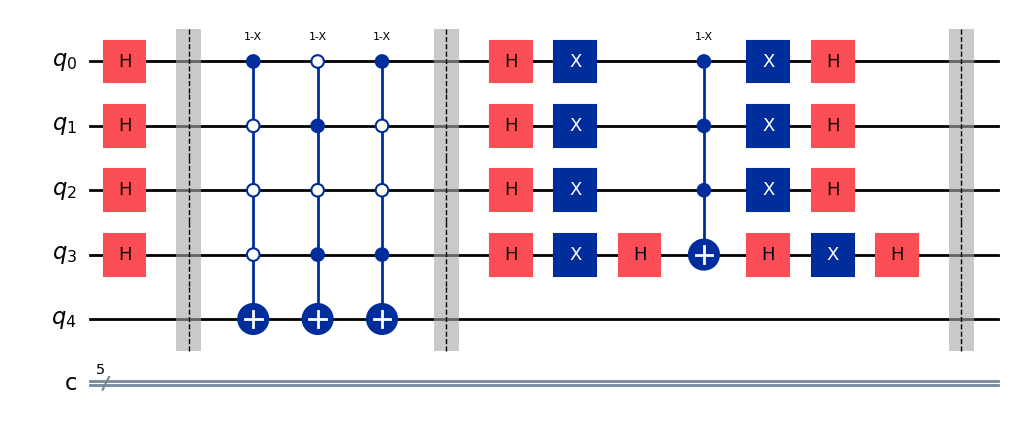

In [18]:
QC=buildCircuit(n+1,states)
QC.draw('mpl')

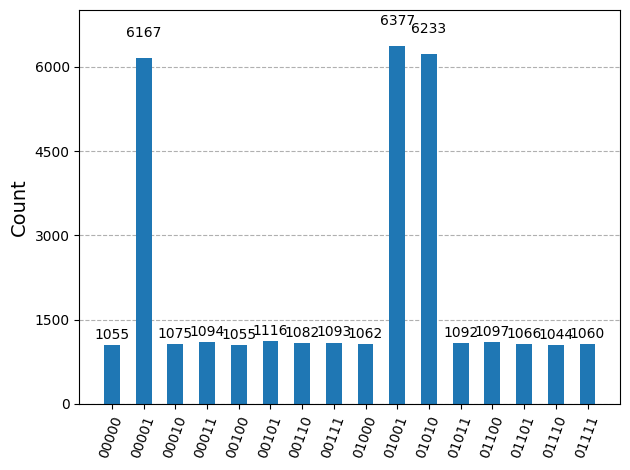

In [19]:
QC.measure(list(range(n)), list(range(n)))
backend=AerSimulator()
QCT=transpile(QC,backend)
jobs=backend.run(QCT,shots=1024*32)
result=jobs.result()
counts=result.get_counts()
plot_histogram(counts)